In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data from CSV files

In [13]:
stores = pd.read_csv('stores_data.csv')
product_availability_table = pd.read_csv('product_data.csv')

# Merge the data

In [14]:
data = pd.merge(stores, product_availability_table, on='store_id')

# Calculate the average historical quantity for each product in each store

In [15]:
average_availability = data.groupby(['store_id', 'product_name'])['quantity'].mean().reset_index()
data = pd.merge(data, average_availability, on=['store_id', 'product_name'], suffixes=('', '_average'))

# Prepare the data

In [16]:
X = data[['quantity_average']]
y = data['quantity']

# Split the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Evaluate the model

In [19]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.005036169876040941


# Save the predictions to a new CSV file

In [20]:
# Prepare the predictions dataframe
predictions_df = X_test.copy()
predictions_df['predicted_quantity'] = y_pred
predictions_df = pd.merge(predictions_df, data, left_index=True, right_index=True, suffixes=('', '_original'))

# Select the required columns
predictions_df = predictions_df[['product_name', 'brand', 'category', 'description', 'quantity', 'quantity_average', 'predicted_quantity']]

# Save the predictions dataframe to a csv file
predictions_df.to_csv("predictions.csv", index=False)

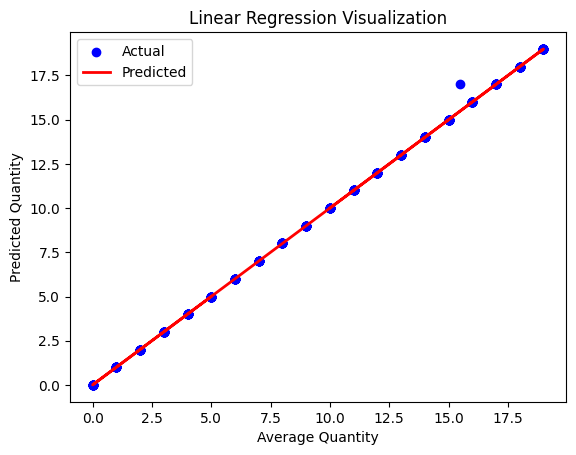

In [32]:
# Create Linear regression diagram

plt.scatter(X_test, y_test, color='blue', label='Actual')

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

# Customize the plot
plt.xlabel('Average Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Linear Regression Visualization')
plt.legend()

# Display the plot
plt.show()

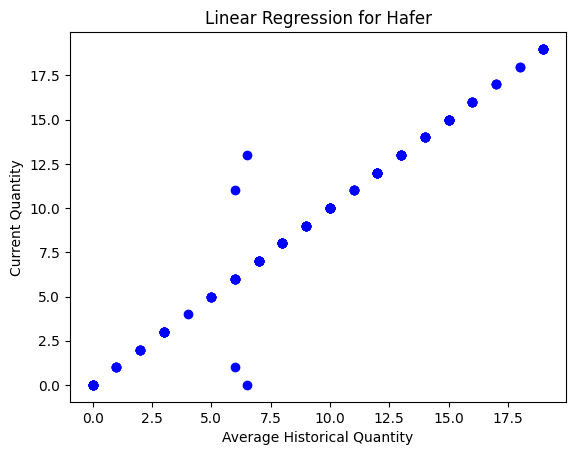

,store_id,store_name,address,latitude,longitude,updated_at,product_id,product_name,quantity,brand,category,description,quantity_average
9,1,Alnatura - Alte Jakobstraße,"Alte Jakobstr. 79-80, 10179 Berlin–...",52.510195,13.408035,2023-03-12 11:40:22.139233+00,1089,Hafer drink,15,Alnatura,"Aliments et boissons à base de végétaux, Boiss...","Bio, Végétarien, Bio européen, Agriculture non...",15.0
17,1,Alnatura - Alte Jakobstraße,"Alte Jakobstr. 79-80, 10179 Berlin–...",52.510195,13.408035,2023-03-12 11:40:22.139233+00,1417,HaferLiebe Schoko,12,Kölln,"Pflanzliche Lebensmittel und Getränke, Getränk...","Niedrig oder kein Fett, Fettarm, Bio, Vegetari...",12.0
18,1,Alnatura - Alte Jakobstraße,"Alte Jakobstr. 79-80, 10179 Berlin–...",52.510195,13.408035,2023-03-12 11:40:22.139233+00,1446,Das Original Joghurt Erdbeer Hafer-Müsli,11,Kölln,"Pflanzliche Lebensmittel und Getränke, Pflanzl...","en:Sustainable, Nachhaltiges Palmöl",11.0
19,1,Alnatura - Alte Jakobstraße,"Alte Jakobstr. 79-80, 10179 Berlin–...",52.510195,13.408035,2023-03-12 11:40:22.139233+00,1476,Haferkleie Flocken,11,Kölln,"Pflanzliche Lebensmittel und Getränke, Pflanzl...",NaN,11.0
25,1,Alnatura - Alte Jakobstraße,"Alte Jakobstr. 79-80, 10179 Berlin–...",52.510195,13.408035,2023-03-12 11:40:22.139233+00,1918,Hafer Drink + Alge,0,Dennree,"Pflanzliche Lebensmittel und Getränke, Getränk...","Bio, Vegetarisch, EU-Öko-Verordnung, Vegan",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,86,Ökotussi,"Großbeerenstr. 11, 10963 Berlin–Kre...",52.498182,13.384815,2023-03-12 11:40:22.139233+00,1367,Haferflocken,0,Bauckhof,NaN,NaN,6.5
2195,86,Ökotussi,"Großbeerenstr. 11, 10963 Berlin–Kre...",52.498182,13.384815,2023-03-12 11:40:22.139233+00,1757,Haferflocken,13,dennree,NaN,"Bio, Bioland",6.5
2196,86,Ökotussi,"Großbeerenstr. 11, 10963 Berlin–Kre...",52.498182,13.384815,2023-03-12 11:40:22.139233+00,1399,Hafer-Müsli - Crunchy Peanut Choc,7,Kölln,"Pflanzliche Lebensmittel und Getränke, Pflanzl...",NaN,7.0
2197,86,Ökotussi,"Großbeerenstr. 11, 10963 Berlin–Kre...",52.498182,13.384815,2023-03-12 11:40:22.139233+00,1410,Knusper Klassik Hafer Müsli,9,Kölln,"en:Getreidekörner, en:Hafer, en:Müslis, en:müs...","en:Sustainable, Vegetarisch, Ohne künstliche A...",9.0


In [31]:

product_name = 'Hafer'

# Filter the data for a specific product and brand
specific_product = data[(data['product_name'].str.contains(product_name))]

# Create a scatter plot of average historical quantity vs. current quantity
plt.scatter(specific_product['quantity_average'], specific_product['quantity'], color='blue')

# Create a line
#x_values = specific_product['quantity_average'].values.reshape(-1, 1)
#y_values = lr.predict(x_values)
#plt.plot(x_values, y_values, color='red', linewidth=2)

# Set labels and title
plt.xlabel('Average Historical Quantity')
plt.ylabel('Current Quantity')
plt.title(f'Linear Regression for {product_name}')

# Show the plot
plt.show()

specific_product
